# HARDWARE IN USE

In [ ]:
!nvidia-smi

**CLONING REPO FROM GITHUB**

In [ ]:
%cd /content/
!git clone https://github.com/noe77778/DD2360_FinalProject

/content
fatal: destination path 'DD2360_FinalProject' already exists and is not an empty directory.


# DATA GENERATION

In [ ]:
%cd /content/DD2360_FinalProject/data/nn
!make hurricanegen
!./hurricanegen 327680 32
!./hurricanegen 171040 16
!./hurricanegen 85520 8

# Initial Profiling


In [ ]:
%cd /content/DD2360_FinalProject/cuda/nn
!nvcc -arch=sm_75 nn_cuda.cu -o Original_code

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./Original_code $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./Original_code $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      
  done
done

# Results

**Execute original datatype with float**

In [ ]:
!nvcc -arch=sm_75 float_DT.cu -o float_DT

Change number of returned records

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./float_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./float_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 5 +++++++++++++++++++++++++++++++++++
==2482== NVPROF is profiling process 2482, command: ./float_DT list84k_8 -r 5 -lat 30 -lng 90
H2D Time: 0.0001941 (s)
Kernel Time: 0.0000589 (s)
D2H Time: 0.0001440 (s)
1996  8  8 12 28 LESLIE     30.0  89.8   63  175 --> Distance=0.199997
1978  6 19  0 20 DEBBY      29.9  90.3  151  486 --> Distance=0.316231
1986  3  8  6 12 ISAAC      29.7  90.2  120  327 --> Distance=0.360553
1966  8  6 12 17 OSCAR      30.3  89.8  119  719 --> Distance=0.360553
1981  7 12  0  9 LESLIE     30.4  90.3  156  694 --> Distance=0.500001
1964  9  8 12 10 WILLIAM    52.2 343.3   76   33 --> Distance=0.000001
1961  3  3  6 14 CHRIS      35.6 153.2   92  569 --> Distance=0.000001
1955  4 26  6 25 OSCAR      33.7 236.6   96  173 --> Distance=0.000001
1964  4 23 18 15 KIRK       44.0 309.0   58  781 --> Distance=0.000001
1980  9  6 18 21 BERYL      47.3 163.9   99  855 --> Distance=0.000001
==2482== Profiling application: ./f

**Execute datatype as double**

In [ ]:
!nvcc -arch=sm_75 double_DT.cu -o double_DT

double_DT.cu: In function ‘int main(int, char**)’:
double_DT.cu:98:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
double_DT.cu:104:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
double_DT.cu:160:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    

Change number of returned records

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 10 #500 50000 500000
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./double_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./double_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 10 +++++++++++++++++++++++++++++++++++
==2657== NVPROF is profiling process 2657, command: ./double_DT list84k_8 -r 10 -lat 30 -lng 90
H2D Time: 0.0003130 (s)
Kernel Time: 0.0000710 (s)
D2H Time: 0.0002661 (s)
1996  8  8 12 28 LESLIE     30.0  89.8   63  175 --> Distance=0.200000
1978  6 19  0 20 DEBBY      29.9  90.3  151  486 --> Distance=0.316228
1986  3  8  6 12 ISAAC      29.7  90.2  120  327 --> Distance=0.360555
1966  8  6 12 17 OSCAR      30.3  89.8  119  719 --> Distance=0.360555
1981  7 12  0  9 LESLIE     30.4  90.3  156  694 --> Distance=0.500000
1985 12 16 18  5 BERYL      29.8  90.5  132  311 --> Distance=0.538516
1988  9 11  0  3 CHRIS      30.4  89.6   52  822 --> Distance=0.565685
1958 10 18 18 17 RAFAEL     29.5  89.6  113  837 --> Distance=0.640312
2001  7 17  6 13 TONY       29.7  90.6   94  612 --> Distance=0.670820
1971 12 21 18  5 SANDY      30.1  89.3   73  555 --> Distance=0.707107
==2657== Profiling application: 

**Execute datatype as fp16 (__half)**

In [ ]:
!nvcc -arch=sm_75 half_DT.cu -o half_DT

half_DT.cu: In function ‘int main(int, char**)’:
half_DT.cu:94:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
half_DT.cu:100:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
half_DT.cu:156:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
     cudaThrea

Change number of returned records

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 #500 50000 500000
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./half_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./half_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 5 +++++++++++++++++++++++++++++++++++
==2834== NVPROF is profiling process 2834, command: ./half_DT list84k_8 -r 5 -lat 30 -lng 90
H2D Time: 0.0000961 (s)
Kernel Time: 0.0000679 (s)
D2H Time: 0.0000899 (s)
1996  8  8 12 28 LESLIE     30.0  89.8   63  175 --> Distance=0.187500
1978  6 19  0 20 DEBBY      29.9  90.3  151  486 --> Distance=0.326172
1986  3  8  6 12 ISAAC      29.7  90.2  120  327 --> Distance=0.351074
1966  8  6 12 17 OSCAR      30.3  89.8  119  719 --> Distance=0.351074
1981  7 12  0  9 LESLIE     30.4  90.3  156  694 --> Distance=0.512695
1964  9  8 12 10 WILLIAM    52.2 343.3   76   33 --> Distance=0.000000
1961  3  3  6 14 CHRIS      35.6 153.2   92  569 --> Distance=0.000000
1955  4 26  6 25 OSCAR      33.7 236.6   96  173 --> Distance=0.000000
1964  4 23 18 15 KIRK       44.0 309.0   58  781 --> Distance=0.000000
1980  9  6 18 21 BERYL      47.3 163.9   99  855 --> Distance=0.000000
==2834== Profiling application: ./ha

**Execute datatype as bfloat16 (__nv_bfloat16)**

In [ ]:
!nvcc -arch=sm_75 bfloat16_DT.cu -o bfloat16_DT

bfloat16_DT.cu: In function ‘int main(int, char**)’:
bfloat16_DT.cu:95:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
bfloat16_DT.cu:101:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
bfloat16_DT.cu:157:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 #500 50000 500000
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./bfloat16_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./bfloat16_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 5 +++++++++++++++++++++++++++++++++++
==3011== NVPROF is profiling process 3011, command: ./bfloat16_DT list84k_8 -r 5 -lat 30 -lng 90
H2D Time: 0.0001130 (s)
Kernel Time: 0.0000830 (s)
D2H Time: 0.0000889 (s)
1996  8  8 12 28 LESLIE     30.0  89.8   63  175 --> Distance=0.000000
1986  3  8  6 12 ISAAC      29.7  90.2  120  327 --> Distance=0.250000
1966  8  6 12 17 OSCAR      30.3  89.8  119  719 --> Distance=0.250000
1971 12 21 18  5 SANDY      30.1  89.3   73  555 --> Distance=0.515625
1978  6 19  0 20 DEBBY      29.9  90.3  151  486 --> Distance=0.515625
1964  9  8 12 10 WILLIAM    52.2 343.3   76   33 --> Distance=0.000000
1961  3  3  6 14 CHRIS      35.6 153.2   92  569 --> Distance=0.000000
1955  4 26  6 25 OSCAR      33.7 236.6   96  173 --> Distance=0.000000
1964  4 23 18 15 KIRK       44.0 309.0   58  781 --> Distance=0.000000
1980  9  6 18 21 BERYL      47.3 163.9   99  855 --> Distance=0.000000
==3011== Profiling application: 

Plot

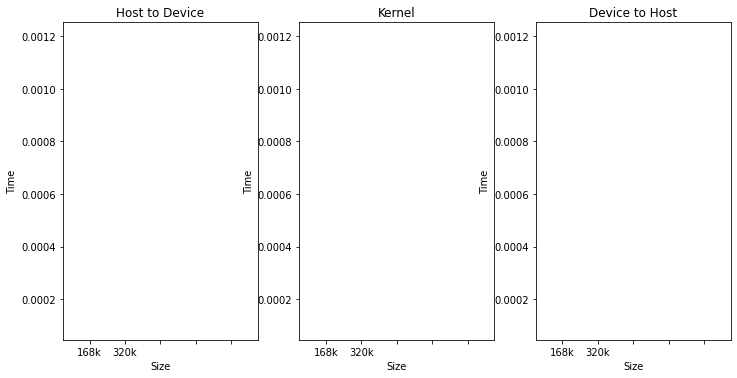

In [ ]:
import matplotlib.pyplot as plt

#data
titles = ["Host to Device", "Kernel", "Device to Host"]
sizes = ["84k", "168k", "320k"]
yLabel = "Time"
xLabel = "Size"

#[H2D, Kernel, D2H]
floatData = {"84k" : [0.0001810, 0.0000570, 0.0001559], "168k" : [0.0003369, 0.0000510, 0.0002749], "320k" : [0.0006411, 0.0000610, 0.0005059] }
doubleData = {"84k" : [0.0003841, 0.0000780, 0.0003009], "168k" : [0.0006220, 0.0001011, 0.0007479] , "320k" : [0.0011971, 0.0001609, 0.0018301]}
fp16Data = {"84k" : [0.0001011, 0.0000701, 0.0000989], "168k" : [0.0001740, 0.0001020, 0.0003049 ], "320k" : [0.0003340, 0.0001409, 0.0002601]}
bfloat16Data = {"84k" : [0.0001111, 0.0000851, 0.0000989 ], "168k" : [0.0001931, 0.0001230, 0.0002890], "320k" : [0.0003109, 0.0001919, 0.0002680]}
typeArray = [floatData, doubleData, fp16Data, bfloat16Data]


fig, ax = plt.subplots(1, 3, figsize=(10, 5))
fig.tight_layout()
for i in range(0,3):
  ax[i].set_title(titles[i])
  ax[i].set_xlabel(xLabel)
  ax[i].set_ylabel(yLabel)
  ax[i].set_xticklabels(sizes)
  for j in range(0,4):
    for k in range(0,3):
      ax[i].plot(typeArray[j][sizes[k]][0])


plt.show()

# plt.plot([5, 500, 50000, 5000000],[0.0000761, 0.0000601, 0.0000589, 0.0000629], 'bo--', linewidth=2, markersize=5)
# plt.title('Host to Device', fontsize=20)
# plt.xlabel('Number of returned records', fontsize=18)
# plt.ylabel('Time (s)', fontsize=18)